**Customer Segmentation & Sales Insights for a Retail Business**

In [103]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import Markdown


In [57]:
df1 = pd.read_excel("D:/Assi/online_retail_II.xlsx",sheet_name="Year 2009-2010")
df2 = pd.read_excel("D:/Assi/online_retail_II.xlsx",sheet_name="Year 2010-2011")

In [58]:
df = pd.concat([df1,df2], ignore_index=True)

In [61]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [63]:
# Remove rows with missing customer ID
df.dropna(subset=["Customer ID"], inplace = True)

In [65]:
#Remove cancelled transactions (Invoice starting with 'C')
df = df[~df["Invoice"].astype(str).str.startswith("C")]

In [66]:
# convert Invoicedate to datetime format
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [69]:
print(df.shape)
df.head()

(779495, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [71]:
# STEP 2: Exploratory Data Analysis (EDA)
# Create a TotalPrice column (Quantity × Unit Price)
df["TotalPrice"] = df["Quantity"] * df["Price"]


Top 10 Selling Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     105185
WHITE HANGING HEART T-LIGHT HOLDER     91757
PAPER CRAFT , LITTLE BIRDIE            80995
ASSORTED COLOUR BIRD ORNAMENT          78234
MEDIUM CERAMIC TOP STORAGE JAR         77916
JUMBO BAG RED RETROSPOT                74224
BROCADE RING PURSE                     70082
PACK OF 60 PINK PAISLEY CAKE CASES     54592
60 TEATIME FAIRY CAKE CASES            52828
PACK OF 72 RETRO SPOT CAKE CASES       45129
Name: Quantity, dtype: int64


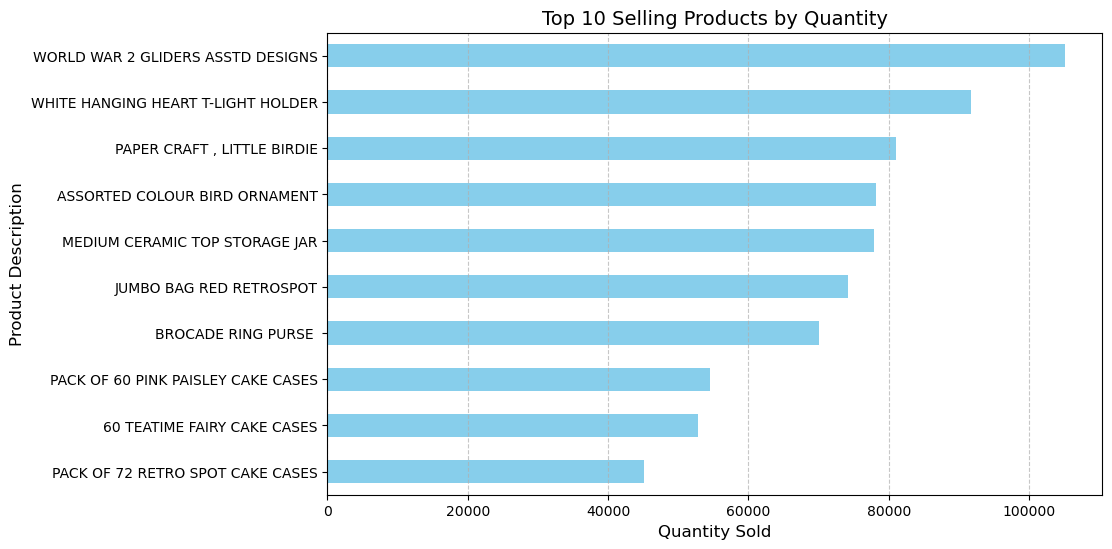

In [115]:
# 1. Top-selling products (by quantity sold)
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Selling Products:\n", top_products)


# Plot Top 10 Selling Products
plt.figure(figsize=(10,6))
top_products.sort_values(ascending=True).plot(kind='barh', color='skyblue')

plt.title("Top 10 Selling Products by Quantity", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


"""


**Observation**

-The highest-selling product is **WORLD WAR 2 GLIDERS ASSTD DESIGNS** with 105,185 units sold, making it a major revenue driver.

-Other top sellers include **WHITE HANGING HEART T-LIGHT HOLDER** (91,757) and **PAPER CRAFT, LITTLE BIRDIE (80,995)**, which are popular decorative items.

-Most top-selling products fall into **home decor and gifting categories.**

-**Cake cases** products (e.g., PACK OF 60 PINK PAISLEY CAKE CASES, 60 TEATIME FAIRY CAKE CASES) indicate strong demand in the *baking accessories* segment.

-These insights suggest holiday/celebration-related products dominate sales, which can guide stock planning and seasonal promotions.
"""


Monthly Sales Trends:
   YearMonth  TotalPrice
0   2009-12  683504.010
1   2010-01  555802.672
2   2010-02  504558.956
3   2010-03  696978.471
4   2010-04  591982.002


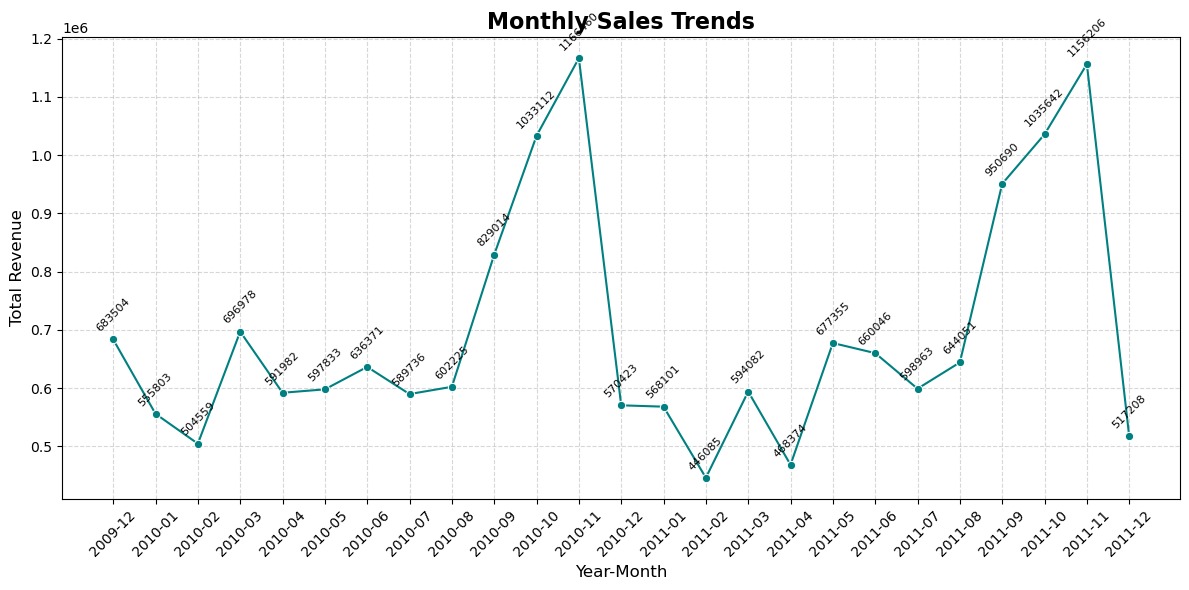

In [127]:
# 2. Sales trends over time (monthly revenue)
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")
monthly_sales = (
    df.groupby("YearMonth")["TotalPrice"]
    .sum()
    .reset_index()
)
print("\nMonthly Sales Trends:\n", monthly_sales.head())


# Ensure proper datetime for plotting
monthly_sales["YearMonth"] = monthly_sales["YearMonth"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(x="YearMonth", y="TotalPrice", data=monthly_sales, marker="o", color="teal")

# Label values on the graph
for i, row in monthly_sales.iterrows():
    plt.text(i, row["TotalPrice"] + 10000, f"{row['TotalPrice']:.0f}", 
             ha='center', va='bottom', fontsize=8, rotation=45)

plt.title("Monthly Sales Trends", fontsize=16, fontweight="bold")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

**Observation:**
- Sales show fluctuations over the months, with notable peaks in **March 2010** and **December 2009**.
- The lowest revenue in the displayed period is in **February 2010**, indicating possible seasonal effects.
- The spike in March 2010 could be linked to seasonal promotions or higher demand before spring.


Top 10 Countries by Sales:
 Country
United Kingdom    1.438923e+07
EIRE              6.165705e+05
Netherlands       5.540381e+05
Germany           4.250197e+05
France            3.487690e+05
Australia         1.692835e+05
Spain             1.083325e+05
Switzerland       1.000619e+05
Sweden            9.151582e+04
Denmark           6.858069e+04
Name: TotalPrice, dtype: float64


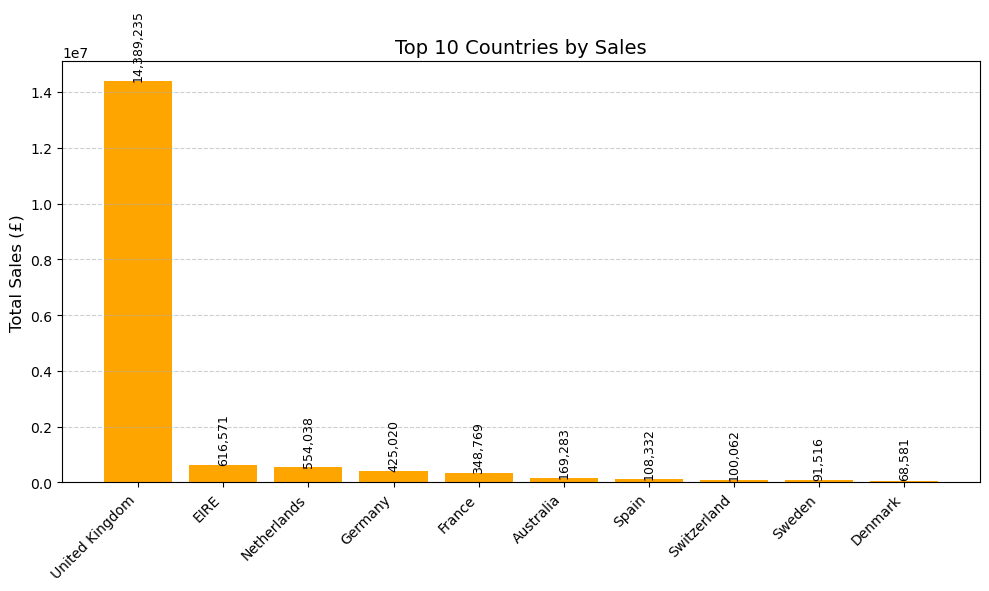

In [135]:
#3. Countries contributing most to sales
country_sales = (
    df.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
print("\nTop 10 Countries by Sales:\n", country_sales)

# Plot Top 10 Countries by Sales
plt.figure(figsize=(10, 6))
bars = plt.bar(country_sales.index, country_sales.values, color='orange')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', 
             ha='center', va='bottom', fontsize=9, rotation=90)

# Formatting
plt.title("Top 10 Countries by Sales", fontsize=14)
plt.ylabel("Total Sales (£)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


**Observation:**
- The United Kingdom is by far the largest contributor to total sales, with revenue exceeding 14 million.
- The next highest contributors are EIRE 616k, Netherlands 554k, and Germany 425k, but each contributes far less than the UK.
- Sales in most other countries are under 350k, showing that the business is highly dependent on the UK market.


In [139]:
# 4. Average Order Value
total_revenue = df["TotalPrice"].sum()
total_orders = df["Invoice"].nunique()
avg_order_value = total_revenue / total_orders
print("\nAverage Order Value:", round(avg_order_value, 2))

# 5. Purchase Frequency
total_customers = df["Customer ID"].nunique()
purchase_frequency = total_orders / total_customers
print("Purchase Frequency:", round(purchase_frequency, 2))

# 6. Revenue per Customer
revenue_per_customer = total_revenue / total_customers
print("Revenue per Customer:", round(revenue_per_customer, 2))



Average Order Value: 469.91
Purchase Frequency: 6.29
Revenue per Customer: 2954.4


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326         12  77556.46
1     12347.0        2          8   4921.53
2     12348.0       75          5   2019.40
3     12349.0       19          4   4428.69
4     12350.0      310          1    334.40


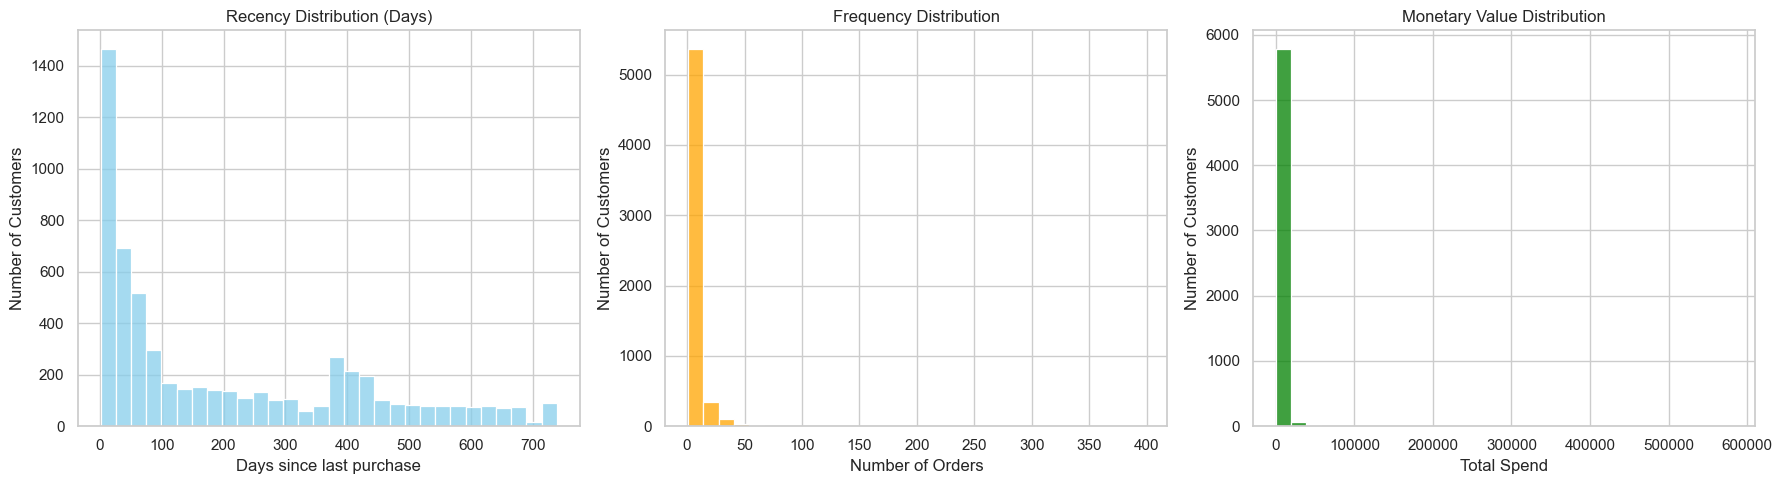

In [143]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute RFM values
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Invoice': 'nunique',                                  # Frequency
    'TotalPrice': 'sum'                                     # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check RFM table
print(rfm.head())


# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
sns.histplot(rfm['Recency'], bins=30, kde=False, ax=axes[0], color='skyblue')
axes[0].set_title('Recency Distribution (Days)')
axes[0].set_xlabel('Days since last purchase')
axes[0].set_ylabel('Number of Customers')

# Frequency distribution
sns.histplot(rfm['Frequency'], bins=30, kde=False, ax=axes[1], color='orange')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Number of Customers')

# Monetary distribution
sns.histplot(rfm['Monetary'], bins=30, kde=False, ax=axes[2], color='green')
axes[2].set_title('Monetary Value Distribution')
axes[2].set_xlabel('Total Spend')
axes[2].set_ylabel('Number of Customers')

plt.tight_layout()
plt.show()


"""

From these plots, you’ll usually observe patterns like:

**Recency:**

-Customers with low recency values are recent buyers (good sign for engagement).

-Customers with high recency haven’t purchased in a while — potential churn risk.

**Frequency:**

-Most customers buy only once or twice, but a smaller group makes frequent purchases (your loyal segment).

**Monetary:**

-Distribution is often skewed — a small percentage of customers contribute a large portion of revenue (80/20 rule).

-Identifying these high-value customers helps with retention & VIP programs.
"""

In [149]:
# Assign R, F, M scores using quartiles
rfm['R_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])  # Lower recency = higher score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine into single RFM score
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)


In [161]:
# Define segments
def segment_customer(rfm_score):
    if rfm_score.startswith('4'):
        return 'Loyal'
    elif rfm_score.startswith('3'):
        return 'Potential'
    elif rfm_score.startswith('2'):
        return 'Needs Attention'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customer)
# Display segment counts
print(rfm['Segment'].value_counts())




Segment
Loyal              1511
Needs Attention    1466
At Risk            1461
Potential          1443
Name: count, dtype: int64


C:\Users\resma\AppData\Local\Temp\ipykernel_11444\3423297908.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=['Loyal', 'Potential', 'Needs Attention', 'At Risk'], palette='viridis')


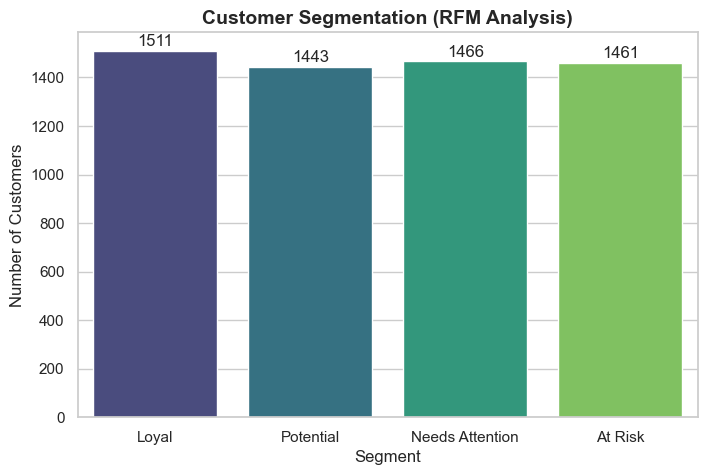

In [163]:
# Set style
sns.set_style("whitegrid")

# Plot segment counts
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Segment', order=['Loyal', 'Potential', 'Needs Attention', 'At Risk'], palette='viridis')

# Add labels
for i, count in enumerate(rfm['Segment'].value_counts()[['Loyal', 'Potential', 'Needs Attention', 'At Risk']]):
    plt.text(i, count + 20, str(count), ha='center', fontsize=12)

# Titles and labels
plt.title("Customer Segmentation (RFM Analysis)", fontsize=14, fontweight='bold')
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


**Observation**

**Loyal (1511 customers)** – This is your strongest group. They buy often and recently, and their spend is high.

**Potential (1443 customers)** – They have good buying behavior but can be nurtured into Loyal customers with targeted offers.

**Needs Attention (1466 customers)** – Their engagement is decreasing. Target them with win-back campaigns.

**At Risk (1461 customers)** – Haven’t purchased in a long time. Use strong promotions or personalized re-engagement tactics.

**Upselling:**

-Bundle best-selling products with complementary items.

-Recommend premium or larger packs at checkout with small incremental discounts.

-Target Segment for Next Campaign

**Primary Target:** Needs Attention (1,466 customers)
This group is more likely to re-engage with a well-designed retention campaign compared to "At Risk" customers.

**Secondary Target:** Potential Customers (1,443 customers)

-These customers show promise and can be nurtured into loyal buyers through upselling and personalized recommendations.





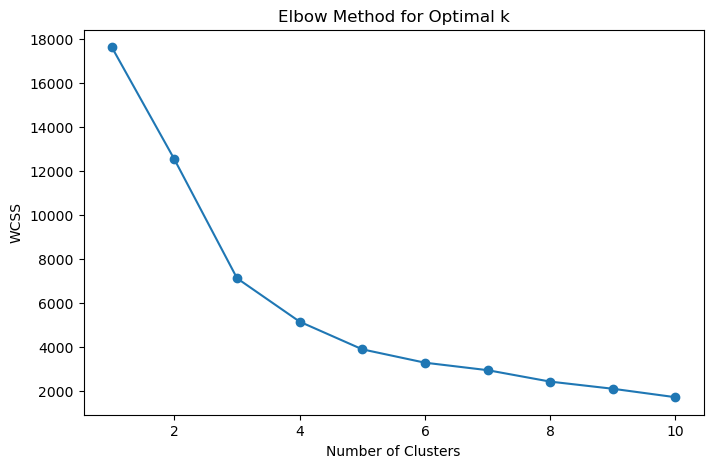


Cluster Summary Table:
   Cluster     Recency   Frequency       Monetary
0        0   67.096875    7.267188    2920.103329
1        1  463.324162    2.207104     747.116260
2        2   24.263158  100.157895   77728.265579
3        3    3.500000  212.750000  428611.997500


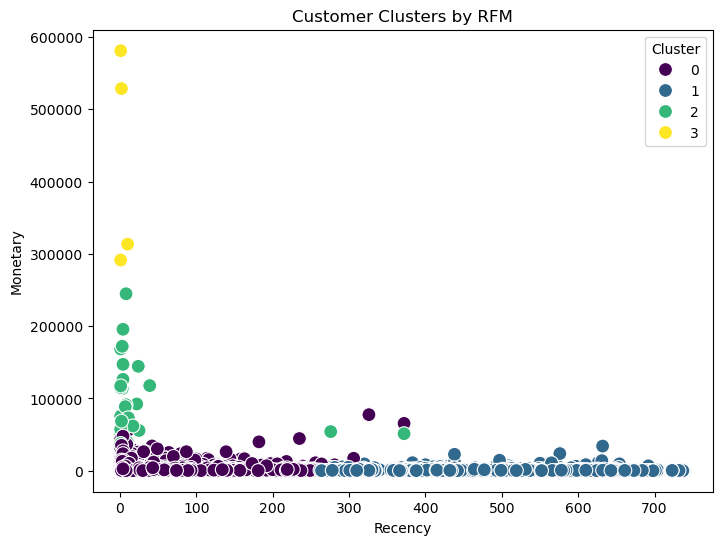

In [99]:
# 1. Standardize RFM data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# 2. Elbow Method to find optimal number of clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# 3. Apply KMeans with chosen k (for example, k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# 4. Table showing average RFM values per cluster
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

print("\nCluster Summary Table:")
print(cluster_summary)

# 5. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters by RFM')
plt.show()


### **RFM Clustering Outcome (KMeans)**

- The dataset was segmented into **4 distinct customer clusters** based on **Recency, Frequency, and Monetary (RFM) scores**.  
- **Cluster 3 (VIP Customers):** Very recent purchases, highest purchase frequency, and top spending – key revenue drivers.  
- **Cluster 2 (Loyal High Spenders):** Frequent and high-value buyers, strong potential for upselling premium products.  
- **Cluster 0 (Moderate Buyers):** Moderate recency and spending – can be nurtured into loyal customers through targeted offers.  
- **Cluster 1 (Inactive Customers):** Long time since last purchase, low frequency and spend – need win-back campaigns.  
- This segmentation enables **personalized marketing strategies** to improve retention, increase revenue, and optimize marketing spend.

**submission Date - 14/08/2025**